<center> <img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="650" height="400"/> </center>

<center><font color=#555555><font size=6> Proyecto Final (Analisis Técnico) </font> <br> <br>
    
<center><font color=#555555><font size=5> MICROESTRUCTURA Y SISTEMAS DE TRADING </font> <br> <br> <br> <br>

<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Andrea Flores Fernández </font> <br> <br>

<center><font color=#555555><font size=6> I.F. Tania Bell Nicholls </font> <br> <br>

<center><font color=#555555><font size=6> I.F. Fernando Guerra Muro </font> <br> <br>

<center><font color=#555555><font size=6> I.F. Blas Cesar Sanchez Barba </font> <br> <br>

     
<center> <font color= #555555> <font size = 4> May 2023 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/if723286/MyST_LAB5_TEAM3'>Link</a></font>
   

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> LAB 5. Proyecto Final </font> <br> <br> <font color= #555555> <font size = 5>Análisis Técnico  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

El análisis técnico se basa en la premisa de que patrones del pasado tienen probabilidad de volver a repetirse en el futuro. Aunque es cierto que es imposible predecir hacía dónde se moverá el mercado, también es cierto que si tu % de efectividad es lo suficientemente bueno, puedes ser rentable. Incluso si tu % de efectividad es bajo pero la relación riesgo-beneficio es alta, puedes tener una efectividad baja y aún así ser rentable.

La naturaleza del mercado de trading de divisas permite la utilización de herramientas para la generación de sistemas de trading. Este laboratorio se enfoca en generar un sistema de trading basado en un análisis técnico con el fin de generar inversiones basadas en señales. De esta manera se mejora la toma de decisiones al basarse en optimizaciones de funciones y del volumen, stop loss y take profit de cada operación.


<br>

## <font color= #6B6B6B> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

A través de este laboratorio, se pretende utilizar el análisis técnico como herramienta para la generación de oportunidades de trading. Mediante la combinación de dos indicadores de análisis técnico, se generará un sistema de trading que optimice la cantidad invertida en divisas, al igual que el stop loss y el take profit.

Se realizarán validaciones visuales del algoritmo de decisión generado con los indicadores y con la optimización de una función de utilidad.

Finalmente, se generará una tabla comparativa de los resultados con 3 medidas de atribución al desempeño.

<br>

## <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

### <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- MetaTrader5
- pandas
- scipy
- numpy
- jupyter
- pytz
- datetime
- ta

### <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/EURUSD.csv : Precios históricos de EURUSD
- files/USDMXN.csv : Precios histróricos de USDMXN

### <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import data as dt
import warnings
warnings.filterwarnings('ignore')
import functions as fc

<br>

## <font color= #6B6B6B> 3. Datos y validaciones </font>

<hr style="border:0.02in solid gray"> </hr>

El capital inicial de este proyecto es de $ \$100,000$ USD y el riesgo máximo por operación o la pérdida máxima por operación que se puede asumir es de $ \$1,000$ USD.

Los datos están dividos en dos secciones; periodo de entrenamiento y periodo de prueba. Las divisas elegidas para este laboratorio son EUR/USD y USD/MXN.

#### Periodo de entrenamiento: 01/ene/2020 - 01/ene/2021

In [3]:
eurusd_train = dt.eurusd_train
eurusd_train.drop(columns=eurusd_train.columns[0], axis=1,  inplace=True)
eurusd_train.head()

,time,open,high,low,close,tick_volume,spread,real_volume
2110,2020-01-02 00:00:00,1.12080,1.12140,1.11628,1.11712,36043,50,0
2111,2020-01-02 06:00:00,1.12124,1.12135,1.12117,1.12135,2963,15,444450000
2112,2020-01-02 06:15:00,1.12135,1.12136,1.12112,1.12114,3639,15,545850000
2113,2020-01-02 06:30:00,1.12114,1.12115,1.12082,1.12090,3489,15,523350000
2114,2020-01-02 06:45:00,1.12090,1.12090,1.12002,1.12005,4789,15,718350000


In [4]:
usdmxn_train = dt.usdmxn_train
usdmxn_train.drop(columns=usdmxn_train.columns[0], axis=1,  inplace=True)
usdmxn_train.head()

,time,open,high,low,close,tick_volume,spread,real_volume
1865,2020-01-02 00:00:00,18.89565,18.92847,18.82735,18.83095,50071,0,0
1866,2020-01-02 06:00:00,18.89660,18.89867,18.89565,18.89837,182,646,18200000
1867,2020-01-02 06:15:00,18.89837,18.90363,18.89767,18.90207,375,530,37500000
1868,2020-01-02 06:30:00,18.90207,18.90765,18.90187,18.90637,241,536,24100000
1869,2020-01-02 06:45:00,18.90637,18.91307,18.90637,18.91017,531,576,53100000


#### Periodo de prueba: 01/Feb/2021 - 01/Feb/2022

In [5]:
eurusd_test = dt.eurusd_test
eurusd_test.drop(columns=eurusd_test.columns[0], axis=1,  inplace=True)
eurusd_test.head()

,time,open,high,low,close,tick_volume,spread,real_volume
27007,2021-01-04 00:00:00,1.22379,1.22384,1.22291,1.22293,668,15,100200000
27008,2021-01-04 00:15:00,1.22293,1.22370,1.22293,1.22340,520,17,78000000
27009,2021-01-04 00:30:00,1.22340,1.22384,1.22322,1.22343,927,15,139050000
27010,2021-01-04 00:45:00,1.22343,1.22353,1.22325,1.22334,309,15,46350000
27011,2021-01-04 01:00:00,1.22334,1.22410,1.22302,1.22391,6232,15,934800000


In [6]:
usdmxn_test = dt.usdmxn_test
usdmxn_test.drop(columns=usdmxn_test.columns[0], axis=1,  inplace=True)
usdmxn_test.head()

,time,open,high,low,close,tick_volume,spread,real_volume
26696,2021-01-04 00:00:00,19.89975,19.97963,19.70202,19.89975,118631,0,2100000
26697,2021-01-04 00:15:00,19.89725,19.89750,19.89500,19.89500,75,2500,7500000
26698,2021-01-04 00:30:00,19.89500,19.89750,19.89200,19.89301,65,2500,6500000
26699,2021-01-04 00:45:00,19.89301,19.89307,19.89301,19.89307,52,2500,5200000
26700,2021-01-04 01:00:00,19.89307,19.89504,19.84544,19.85333,1203,2485,120300000


<br>

## <font color= #6B6B6B> 3. Aspectos financieros </font>

<hr style="border:0.02in solid gray"> </hr>

###  <font color= #6B6B6B> Sistema de trading</font>

Un sistema de trading es un conjunto de reglas que le indican al trader cuándo operar. Se basan en análisis técnico para poder determinar el momento más rentable para entrar al mercado y cuándo es el mejor momento para salir. El sistema también puede indicarle cuánto debe operar en cada transacción. 

Los sistemas de trading son la base para las inversiones ya que permiten determinar cuándo abrir una posición, su tamaño y el tiempo que deberá permanecer abierta. Incluso pueden definir la gestión de la posición mientras se desarrolla, las técnicas de control de riesgo, los cálculos de gestión de capital, la diversificación del portafolio, entre otros aspectos.

PONER CUATRO CRITERIOS DE TRADING ??!!

Los sistemas pueden ser manuales o automatizados y se basan en diferentes técnicas y metodologías de análisis de mercado. Estas técnicas pueden basarse en el análisis técnico, análisis fundamental o análisis cuantitativo. En este laboratorio se realiza un análisis técnico.


- Hacer 5 validaciones visuales del algoritmo de decision utilizando estudios técnicos.

- Apoyar en aspectos computacionales.

- Apoyar en aspectos estadísticos.

- Realizar una tabla comparativa de los resultados con 3 MAD que propongas, utilizando los datos de la evolución del capital acumulado, tanto de la configuración de parámetros que se eligió del periodo de entrenamiento, como para los resultados en el periodo de prueba con los parámetros de la configuración elegida del periodo de entrenamiento (con los mismos datos pero en periodos diferentes).

###  <font color= #6B6B6B> Aspectos Estadísticos</font>

#### Bandas de Bollinger

Las bandas de bollinger son una herramienta de análisis técnico definidas por un conjunto de líneas de tendencia. Se grafican dos desviaciones estándares, tanto positivas como negativas, de una media móvil simple del precio de un valor. Fueron desarrolladas por John Bollinger para proporcionar a los traders una manera de identificar los periodos de alta y baja probabilidad de cambio.

La franja entre las bandas superior e inferior contiene, estadísticamente, casi un 90% de las posibles variaciones del precio. Las bandas son utilizadas para identificar cambios de tendencia en el precio e identificar fortaleza o debilidad en la misma.

In [ ]:
fc.bollinger(usdmxn_train)

In [ ]:
fc.bollinger(eurusd_train)

#### Relative Strength Index (RSI)

El RSI mide el impulso de los cambios en el precio de un activo para evaluar si el precio de dicho activo está sobrevendido o sobrecomprado. Este indicador es parte de la categoría de los osciladores y fue creado por J. Welles Wilder Jr.

El indicador proporciona una medida de qué tan bien se está comportando el precio de un activo frente a sí mismo. Con un nivel de RSI por encima de 70 significa que está sobrevalorado y un nivel debajo de 30 indica que un activo está sobrevendido.

El RSI se calcula mediante la siguiente fórmula:

$RSI=100-\frac{100}{1+RS}$

en donde

$RS=\frac{Avg Up}{Avg Down}$

siendo:

$Avg Up$ el promedio de las variaciones al alza del precio en el periodo N y $Avg Down$ el promedio de las variaciones a la baja del precio en el periodo N.

Habitualmente, se considera un periodo de 14 para el cálculo del RSI.

Para obtener señales de trading con el RSI se puede hacer mediante la identificación de divergencias o mediante el análisis de formaciones de doble fondo.

In [ ]:
fc.rsi(usdmxn_train)

In [ ]:
fc.rsi(eurusd_train)

#### Generación de señal de compra o de venta

Para este laboratorio, la señal de compra o de venta se generó basada en las bandas de bollinger y el RSI. Si estos dos indicadores marcan una compra, se realiza la compra y lo mismo va para la venta. Pero si los indicadores tienen señales distintas, se respeta la señal generada por las bandas de bollinger

In [ ]:
fc.signal(usdmxn_train)

In [ ]:
fc.signal(eurusd_train)

###  <font color= #6B6B6B> 3.3 Aspectos Computacionales</font>

1.  Función de utilidad:
___
2. Parámetro a optimizar:

**a)** Stop Loss:

· Qué es: Cantidad de pips en contra de dónde se abrió la operación.

· Expresado en: Pips (valor numérico %)

· Rango: 0-1% del capital total

**b)** Take Profit:

· Qué es: Cantidad de pips que se mueve a favor tu operación para cerrarla y tomar ganancias.

· Expresado en: Pips (valor numérico %)

· Rango: 1-4% del capital total 

**c)** Volumen:

· Qué es: Tamaño de operación (Lotes, % del capital total, etc)

· Expresado en: Valor númerico

· Rango: 1-10 lotes
___
3. Espacio de búsqueda:
____

4. Tiempo de búsqueda exhaustiva:
____

5. Método de optimización: 
### PSO:

El PSO, o Optimización por Enjambre de Partículas, es un método heurístico de optimización que imita el comportamiento natural para resolver problemas. Este algoritmo se basa en una población de soluciones candidatas llamadas "partículas", que se mueven a través del espacio de búsqueda siguiendo reglas matemáticas que consideran tanto la posición como la velocidad de cada partícula. Cada partícula se ve influenciada por su mejor posición local y las mejores posiciones globales encontradas por otras partículas en su recorrido. El objetivo es lograr que el enjambre de partículas converja rápidamente hacia las soluciones más óptimas.
___
6. Gráfica de convergencia:
___

In [ ]:
fc.automated_trading(usdmxn_train, window_length=15, k=3, rsi_window=1, volume=1000, stop_loss=0.03, take_profit=0.3)

In [ ]:
fc.optimize_parameters(usdmxn_train,max_volume=100000, max_stop_loss=0.5, max_take_profit=0.5)

# <font color= #6B6B6B> <font size = 6> 5. Aplicacion las reglas para la toma de decisiones en df_decisiones con los datos de prueba. </font>

In [7]:
best_params = fc.optimize_parameters_pso(eurusd_train, max_volume=10000, max_stop_loss=0.05, max_take_profit=0.1, num_particles=10, num_iterations=10)

2023-05-09 08:11:24,016 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-1e+5
2023-05-09 08:14:28,011 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -100398.1695006085, best pos: [9.99421437e+03 2.89370791e-03 3.46476326e-02]


In [8]:
params = best_params[-1]
results = fc.automated_trading(usdmxn_test, window_length=15, k=3, rsi_window=1, volume=params[0], stop_loss=params[1], take_profit=params[2])

In [10]:
results[-1]

,type,open_price,amount,value,stop_loss,take_profit,pnl,balance
1,short,19.78745,9994.214373,197760.017189,19.730191,20.473038,-2186.734105,97813.265895
4,short,20.08401,9994.214373,200723.901404,20.025893,20.779873,1239.382524,99052.648420
12,short,20.30661,9994.214373,202948.613523,20.247849,21.010186,-2672.352981,105194.492920
17,short,19.91505,9994.214373,199035.278943,19.857422,20.605059,-3141.881172,102052.611748
20,short,19.91750,9994.214373,199059.764768,19.859865,20.607594,-346.499412,101706.112336
22,short,19.87231,9994.214373,198608.126221,19.814805,20.560838,-831.418694,100874.693642
24,short,19.80900,9994.214373,197975.392509,19.751679,20.495335,-8465.099574,92409.594068
29,short,19.86620,9994.214373,198547.061571,19.808713,20.554517,-26.984379,92382.609689
31,short,19.87495,9994.214373,198634.510947,19.817438,20.563570,-1503.129842,90879.479848
33,short,20.19039,9994.214373,201787.085928,20.131965,20.889939,-1799.058529,89080.421319


<AxesSubplot: >

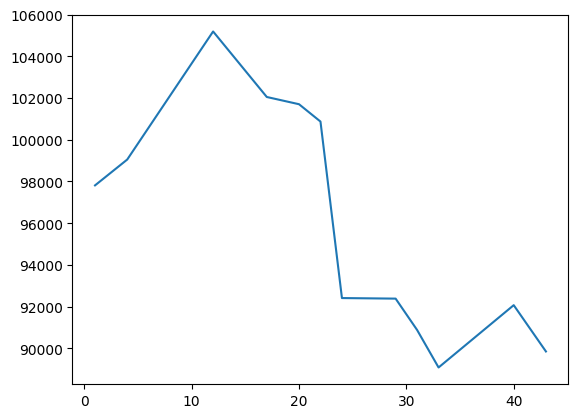

In [13]:
final_df = results[-1]
final_df['balance'].plot.line()

In [25]:
import pandas as pd

# Leer los datos del archivo csv
data = final_df

# Calcular el rendimiento en porcentaje para cada operación
data["rendimiento"] = (data["balance"] / data["balance"].shift(1) - 1) * 100

# Calcular las tres medias de atribución de desempeño
media_aritmetica = data["rendimiento"].mean()
media_geometrica = (data["rendimiento"] + 100).prod() ** (1 / len(data)) - 100
media_armonica = len(data) / sum(1 / (data["rendimiento"] + 100)) - 100

# Imprimir los resultados
print("Media Aritmética:", media_aritmetica)
print("Media Geométrica:", media_geometrica)
print("Media Armónica:", media_armonica)


Media Aritmética: -0.7055030520223018
Media Geométrica: -32.35130654159093
Media Armónica: nan


Con los resultados anteriores que encontraste para los parámetros de la estrategia de trading,  aplica las reglas para la toma de decisiones en df_decisiones con los datos de prueba.

- Elige 1 resultado de optimización (Periodo de optimizacion)
- Grafica la evolucion de capital en este periodo (Grafica Evolucion de Capital (Linea)) 
- Imprime los datos calculados en el df_backtest.
- Con la misma configuración de parámetros encontrada en el paso anterior, usa los datos del periodo de prueba
- Utiliza sus parámetros: Volumen, TakeProfit, StopLoss
- Grafica la evlucion de capital en este periodo (Grafica Evolucion de Capital (Linea)) 
-- Imprime los datos calculados en el df_prueba.

In [ ]:
# Here you include content from data conceptual, statistical and visual description

<br>

# <font color= #6B6B6B> <font size = 6> 5. Conclusions </font>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

Investopedia. (2021). Trading System. Recuperado el 3 de mayo de 2023, de https://www.investopedia.com/terms/t/tradingsystem.asp

Trading Education. (s.f.). What is a Trading System? Recuperado el 3 de mayo de 2023, de https://trading-education.com/what-is-a-trading-system

Nextmarkets. (s.f.). Sistemas de trading. Nextmarkets. Recuperado el 3 de mayo de 2023, de https://www.nextmarkets.com/es/trading/formacion/sistemas-trading

Novatos Trading Club. (s.f.). Sistema de trading ¿qué es eso? Recuperado el 3 de mayo de 2023, de https://www.novatostradingclub.com/principiantes/sistema-de-trading-%C2%BFque-es-eso/


Avatrade. (s.f.). Bandas de Bollinger. AvaTrade. Recuperado el 3 de mayo de 2023, de https://www.avatrade.es/educacion/trading-para-principiantes/bandas-de-bollinger

Avatrade. (s.f.). Estrategias de trading RSI. AvaTrade. Recuperado el 4 de mayo de 2023, de https://www.avatrade.es/educacion/professional-trading-strategies/rsi-trading-strategies

<br>